In [1]:
# import section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from ipywidgets import *

In [2]:
# temp
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.__version__

'0.8.1'

## TO DO LIST

* controle of de warnings uit kunnen als seaborn 0.9.0 voor Conda beschikbaar is
* seaborn met widgets: select x, select y, select species (multiple),  select 'kind'
* folium! + widgets
* folium wachttijden
* folium selecteer specialisme en toon map
* folium slecteer 3 specialismen en toon 3 boxplots in seaborn!

* [KMeans clustering Iris](http://constantgeeks.com/playing-with-iris-data-kmeans-clustering-in-python/)


### matplotlib.pyplot

$f(x) = x^2$

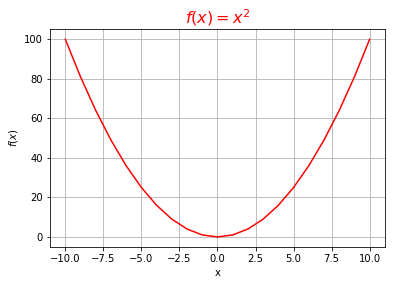

In [4]:
x = np.array(np.arange(-10, 11))
y = x ** 2
plt.plot(x, y, color='r', linewidth=1.5)
plt.title(r'$f(x) = x^2$', fontsize=16, color='r') # LaTeX function in title!
plt.xlabel('x')
plt.ylabel(r'$f(x)$')
plt.grid(True)
plt.show()

### Widgets

In [5]:
widgets.IntSlider(value=4, min=0, max=10, step=2, description='Demo')

IntSlider(value=4, description='Demo', max=10, step=2)

In [6]:
widgets.IntRangeSlider(value=[3, 7], min=0, max=10, step=1, description='Demo',)

IntRangeSlider(value=(3, 7), description='Demo', max=10)

In [7]:
widgets.RadioButtons(options=['A', 'B', 'C'], value='B', description='Demo')

RadioButtons(description='Demo', index=1, options=('A', 'B', 'C'), value='B')

In [8]:
widgets.Dropdown(options=[char for char in 'ABCDE'], value='B', description='Demo')

Dropdown(description='Demo', index=1, options=('A', 'B', 'C', 'D', 'E'), value='B')

In [9]:
widgets.Select(options=[char for char in 'ABCDEFGHIJKLMNOPQRSTUVW'],
               value='D',
               rows=3,
               description='Demo')

Select(description='Demo', index=3, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W'), rows=3, value='D')

In [10]:
widgets.ToggleButtons(options=['A', 'B', 'C'],
                      description='Demo',
                      value='B',
                      tooltips=['Omschrijving A', 'Omschrijving B', 'Omschrijving C']
)

ToggleButtons(description='Demo', index=1, options=('A', 'B', 'C'), tooltips=['Omschrijving A', 'Omschrijving B', 'Omschrijving C'], value='B')

### Interactive plot!

In [11]:
# interactive plot
def graph(macht):
    x = np.linspace(-20, 21, 200)
    y = x**macht
    plt.plot(x, y, color='r', linewidth=1.5)
    plt.title(r'$f(x) = x^{}$'.format(macht), fontsize=16, color='r') # LaTeX function in title!
    plt.xlabel('x')
    plt.ylabel(r'$f(x)$')
    plt.grid(True)
    return plt.show()

interact(graph,
         macht = widgets.IntSlider(value=2, min=1, max=7, description='Macht')
        )

interactive(children=(IntSlider(value=2, description='Macht', max=7, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.graph>

In [12]:
# interactive plot with multiple widgets
def graph(macht, kleur, raster):
    x = np.linspace(-20, 21, 100)
    y = x**macht
    plt.plot(x, y, color=kleur, linewidth=1.5)
    plt.title(r'$f(x) = x^{}$'.format(macht), fontsize=16, color=kleur) # LaTeX function in title!
    plt.xlabel('x')
    plt.ylabel(r'$f(x)$')
    plt.grid(raster)
    return plt.show()

interact(graph,
         macht = widgets.IntSlider(value=2, min=1, max=5, description='Macht'),
         kleur = widgets.RadioButtons(options=['red', 'green', 'blue'], value='green', description='Kleur'),
         raster = widgets.Checkbox(value=True, description='Raster', disabled=False)
        )

interactive(children=(IntSlider(value=2, description='Macht', max=5, min=1), RadioButtons(description='Kleur', index=1, options=('red', 'green', 'blue'), value='green'), Checkbox(value=True, description='Raster'), Output()), _dom_classes=('widget-interact',))

<function __main__.graph>

### Seaborn

In [13]:
# load dataset
iris = sns.load_dataset('iris')

In [15]:
# interactive row selection
def iris_filter(length, width):
    selection = iris[(iris.sepal_length >= length[0]) & (iris.petal_length >= length[0]) & (iris.sepal_length <= length[1]) & (iris.petal_length <= length[1]) & (iris.sepal_width >= width[0]) & (iris.petal_width >= width[0]) & (iris.sepal_width <= width[1]) & (iris.petal_width <= width[1])]
    print('Aantal rijen in selectie: {}'.format(selection.shape[0]))
    return selection

interact(iris_filter,
         length = widgets.FloatRangeSlider(value=[min([iris.sepal_length.min(), iris.petal_length.min()]) + 2,
                                                  max([iris.sepal_length.max(), iris.petal_length.max()]) - 2],
                                           min=min([iris.sepal_length.min(), iris.petal_length.min()]),
                                           max=max([iris.sepal_length.max(), iris.petal_length.max()]),
                                           step=0.1, readout_format='.1f'),
         width = widgets.FloatRangeSlider(value=[min([iris.sepal_width.min(), iris.petal_width.min()]) + 1.5,
                                                 max([iris.sepal_width.max(), iris.petal_width.max()]) - 1.5],
                                          min=min([iris.sepal_width.min(), iris.petal_width.min()]),
                                          max=max([iris.sepal_width.max(), iris.petal_width.max()]),
                                          step=0.1,readout_format='.1f'))

interactive(children=(FloatRangeSlider(value=(3.0, 5.9), description='length', max=7.9, min=1.0, readout_format='.1f'), FloatRangeSlider(value=(1.6, 2.9000000000000004), description='width', max=4.4, min=0.1, readout_format='.1f'), Output()), _dom_classes=('widget-interact',))

<function __main__.iris_filter>

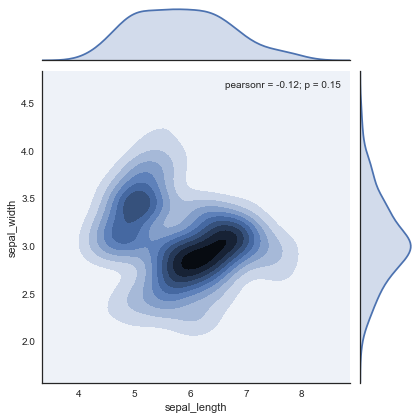

In [16]:
# seaborn jointplot
sns.set(style='white')
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind="kde")
plt.show()

In [18]:
# interactive plot with multiple widgets
def graph(x, y, species, type):
    sns.jointplot(x=x, y=y, data=iris[iris.species == species], kind=type)
    return plt.show()

interact(graph,
         type = widgets.ToggleButtons(options=['kde', 'reg', 'scatter', 'resid', 'hex'], description='Type'),
         species = widgets.RadioButtons(options=iris.species.unique(), description='Species', value='virginica'),
         x = widgets.Dropdown(options=iris.columns[:-1], description='X-axis', value='petal_length'),
         y = widgets.Dropdown(options=iris.columns[:-1], description='Y-axis', value='petal_width')
        )

interactive(children=(Dropdown(description='X-axis', index=2, options=('sepal_length', 'sepal_width', 'petal_length', 'petal_width'), value='petal_length'), Dropdown(description='Y-axis', index=3, options=('sepal_length', 'sepal_width', 'petal_length', 'petal_width'), value='petal_width'), RadioButtons(description='Species', index=2, options=('setosa', 'versicolor', 'virginica'), value='virginica'), ToggleButtons(description='Type', options=('kde', 'reg', 'scatter', 'resid', 'hex'), value='kde'), Output()), _dom_classes=('widget-interact',))

<function __main__.graph>

### Opdracht wachttijden!

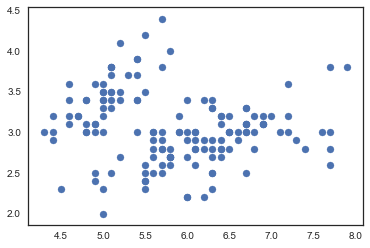

In [307]:
# basic plot
plt.scatter(x = iris.sepal_length, y = iris.sepal_width)
plt.show()

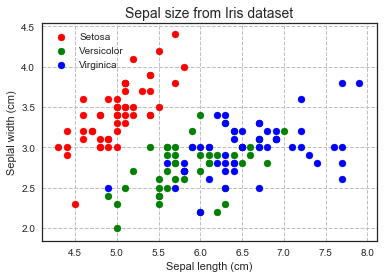

In [328]:
# colors
fig = plt.figure()
ax = fig.add_subplot(111)

species_1 = ax.scatter(x = iris[:50].sepal_length, y = iris[:50].sepal_width,  c='red')
species_2 = ax.scatter(x = iris[50:100].sepal_length, y = iris[50:100].sepal_width,  c='green')
species_3 = ax.scatter(x = iris[100:].sepal_length, y = iris[100:].sepal_width,  c='blue')

ax.legend([species_1, species_2, species_3], ['Setosa', 'Versicolor', 'Virginica'], loc=2)

ax.set_title('Sepal size from Iris dataset', fontsize=14)

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Seplal width (cm)')

ax.grid(True, linestyle='--', color='0.75')

plt.show()

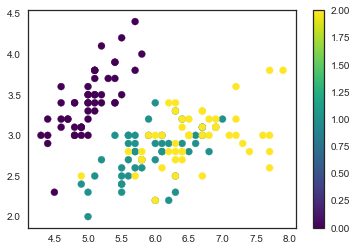

In [342]:
# colormaps
from sklearn.datasets import load_iris
iris = load_iris()
plt.scatter(x=iris.data[:,0], y=iris.data[:,1], c=iris.target, cmap='viridis')
plt.colorbar()
plt.show()

In [113]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [116]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [117]:
mpg.shape

(398, 9)

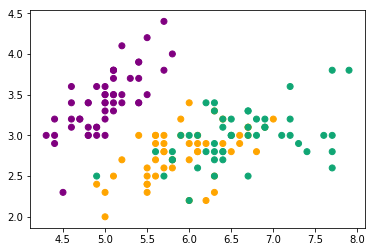

In [193]:
# colors
colors = {'setosa': 'purple', 'versicolor': 'orange', 'virginica': '#10a674'} # color namens and html-colors
plt.scatter(x=iris.sepal_length, y=iris.sepal_width, c=[colors[i] for i in iris.species])
plt.show()

In [ ]:
axarr[0].set_title('setosa')
axarr[0].scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa

axarr[1].set_title('versicolor')
axarr[1].scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor

axarr[2].set_title('virginica')
axarr[2].scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

In [303]:
# load data
iris = load_iris()

df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target']) 
pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
pd.DataFrame(data = iris['target'], columns =['species'])

,species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [298]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [299]:
iris['feature_names'] + ['target']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'target']

In [300]:
pd.DataFrame(data.data, columns=data.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


See [https://matplotlib.org/api/colors_api.html](https://matplotlib.org/api/colors_api.html) and [https://xkcd.com/color/rgb/](https://xkcd.com/color/rgb)

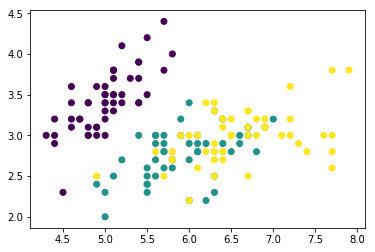

In [245]:
# colormaps
colors = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
plt.scatter(x=iris.sepal_length, y=iris.sepal_width, c=[colors[i] for i in iris.species], cmap='viridis')
plt.show()

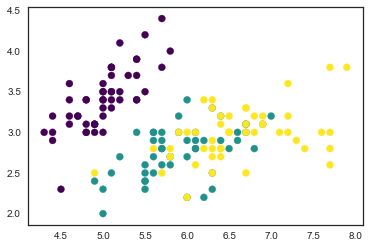

In [293]:
plt.scatter(x=iris.data[:,0], y=iris.data[:,1], c=iris.target, cmap='viridis')

In [250]:
len(iris.data[:,[0]])

150

[Colormaps Reference]( https://matplotlib.org/examples/color/colormaps_reference.html)

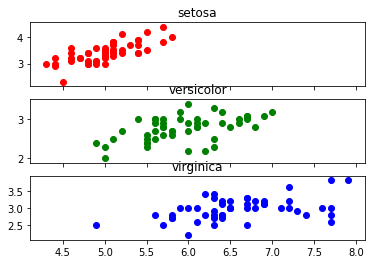

In [189]:
# Shared x-axis
f, axarr = plt.subplots(3, sharex=True)

axarr[0].set_title('setosa')
axarr[0].scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa

axarr[1].set_title('versicolor')
axarr[1].scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor

axarr[2].set_title('virginica')
axarr[2].scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

plt.show()

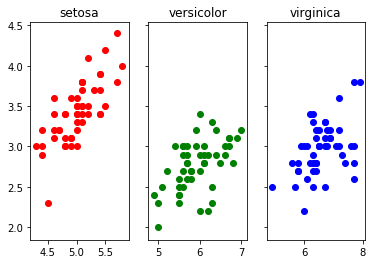

In [192]:
# shared y-axis
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

ax1.set_title('setosa')
ax1.scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa

ax2.set_title('versicolor')
ax2.scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor

ax3.set_title('virginica')
ax3.scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

plt.show()

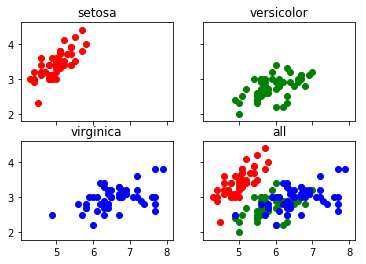

In [188]:
# shared y-axis
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

ax1.set_title('setosa')
ax1.scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa

ax2.set_title('versicolor')
ax2.scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor

ax3.set_title('virginica')
ax3.scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

ax4.set_title('all')
ax4.scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa
ax4.scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor
ax4.scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

plt.show()

### Seaborn

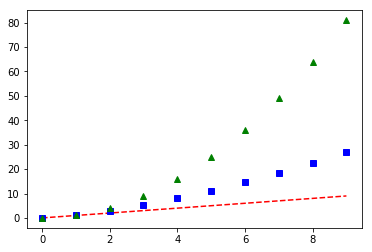

In [16]:
# red dashes, blue squares and green triangles
x = np.array(np.arange(10))
plt.plot(x, x, 'r--', x, x**1.5, 'bs', x, x**2, 'g^')
plt.show()

In [ ]:
https://matplotlib.org/users/pyplot_tutorial.html

In [ ]:
https://stackoverflow.com/questions/45862223/use-different-colors-in-scatterplot-for-iris-dataset

In [ ]:
https://gist.github.com/jobliz/2903500

In [ ]:
https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html

In [ ]:
https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py

In [ ]:
https://matplotlib.org/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py

In [ ]:
# scatter histogram
https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

In [29]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

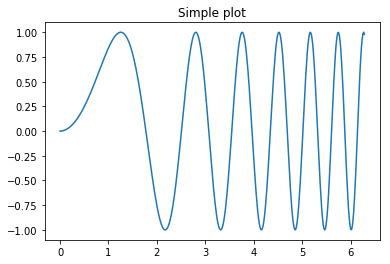

In [30]:
plt.plot(x, y)
plt.title('Simple plot')
plt.show()

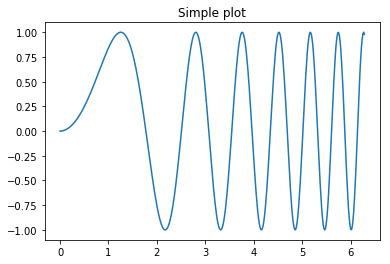

In [31]:
# Just a figure and one subplot
np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

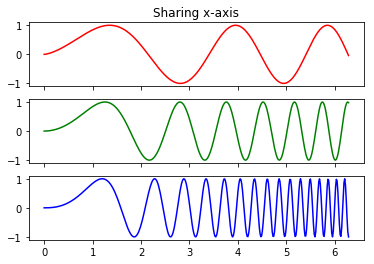

In [77]:
# Three subplots, the axes array is 1-d
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, axarr = plt.subplots(3, sharex=True)
axarr[0].set_title('Sharing x-axis')
axarr[0].plot(x, np.sin(x ** 1.5), 'r')
axarr[1].plot(x, np.sin(x ** 2.0), c='g')
axarr[2].plot(x, np.sin(x ** 2.5), c='b')
plt.show()

Text(0.5,1,'Easy as 1, 2, 3')

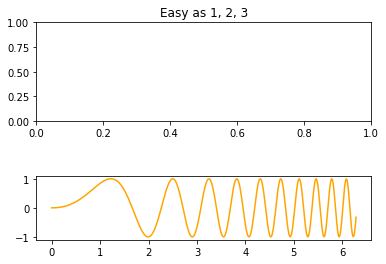

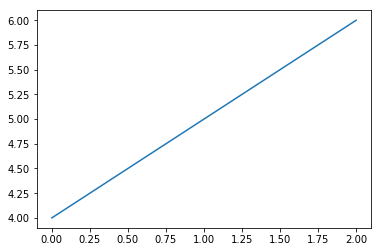

In [90]:
x = np.linspace(0, 2 * np.pi, 400)

plt.figure(1)                # the first figure

plt.subplot(311)             # the first subplot in the first figure
plt.plot(x, np.sin(x ** 1.5))

plt.subplot(312)             # the second subplot in the first figure
plt.plot(x, np.sin(x ** 1.75), color='green')

plt.subplot(312)             # the second subplot in the first figure
plt.plot(x, np.sin(x ** 2.0), color='red')

plt.subplot(313)             # the second subplot in the first figure
plt.plot(x, np.sin(x ** 2.25), color='orange')


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

In [72]:
np.arange(-25, 26)

array([-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13,
       -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25])

In [91]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

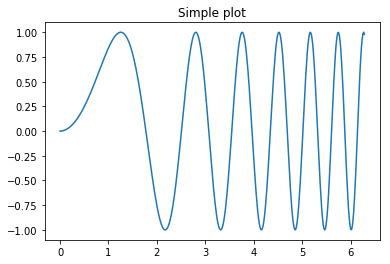

In [92]:
# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

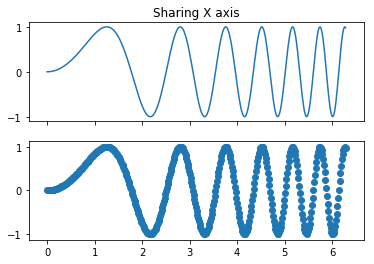

In [93]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)
plt.show()

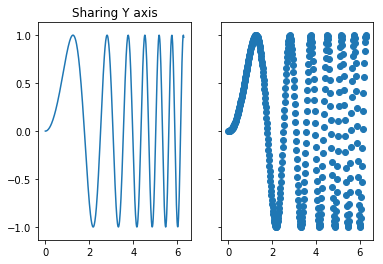

In [94]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

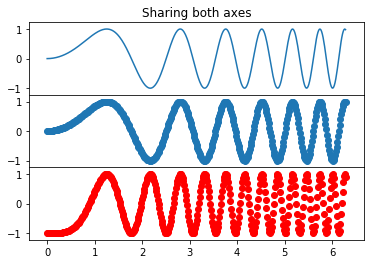

In [95]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

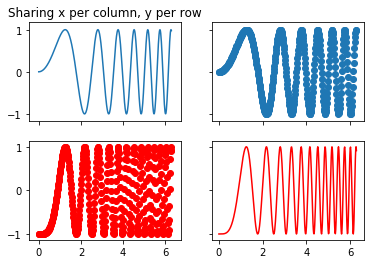

In [96]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

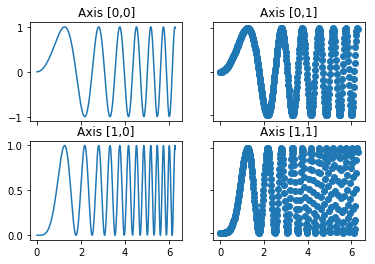

In [97]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
plt.show()

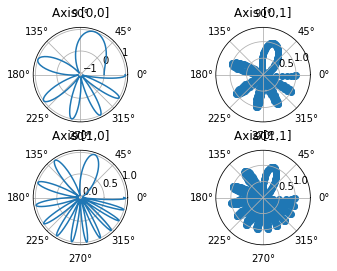

In [98]:
# Four polar axes
f, axarr = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)
plt.show()

In [99]:
plt.close('all')

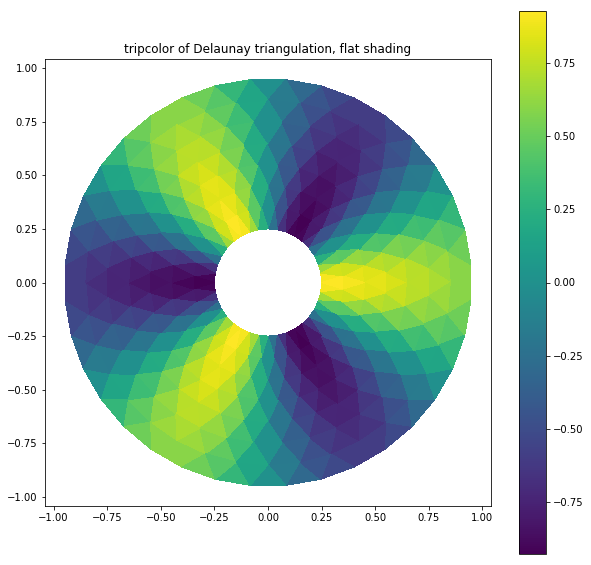

In [17]:
# matplotlib demo from https://matplotlib.org/gallery
import matplotlib.tri as tri
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles
x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()
triang = tri.Triangulation(x, y)
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1), y[triang.triangles].mean(axis=1)) < min_radius)
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
plt.tripcolor(triang, z, shading='flat')
plt.colorbar()
plt.title('tripcolor of Delaunay triangulation, flat shading')
plt.show()

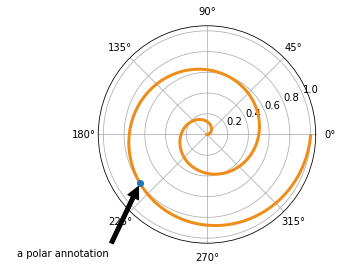

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )
plt.show()

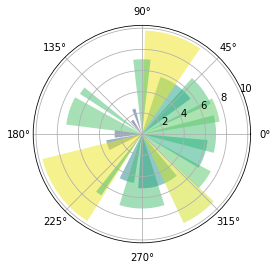

In [19]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()

In [255]:
# load dataset
iris = sns.load_dataset('iris')

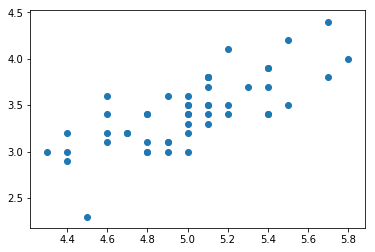

In [256]:
colors = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
plt.scatter(x=iris.loc[iris.species == 'setosa', 'sepal_length'], y=iris.loc[iris.species == 'setosa', 'sepal_width'])

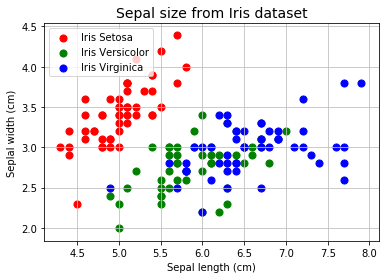

In [257]:
fig = plt.figure()
ax = fig.add_subplot(111)
setosa = ax.scatter(iris.loc[iris.species == 'setosa', 'sepal_length'],
                    y=iris.loc[iris.species == 'setosa', 'sepal_width'],
                    s=50,
                    c='red')
versicolor = ax.scatter(iris.loc[iris.species == 'versicolor', 'sepal_length'],
                        y=iris.loc[iris.species == 'versicolor', 'sepal_width'],
                        s=50,
                        c='green')
virginica = ax.scatter(iris.loc[iris.species == 'virginica', 'sepal_length'],
                       y=iris.loc[iris.species == 'virginica', 'sepal_width'],
                       s=50,
                       c='blue')
ax.set_title('Sepal size from Iris dataset', fontsize=14)
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Seplal width (cm)')
ax.legend([setosa, versicolor, virginica], ["Iris Setosa", "Iris Versicolor", "Iris Virginica"], loc=2)

ax.grid(True, linestyle='-',color='0.75')

plt.show()

In [258]:
iris.loc[iris.species == 'setosa', 'sepal_length']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

In [269]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', palette=cmap, data=iris) # 0.9.0 ??

AttributeError: module 'seaborn' has no attribute 'scatterplot'

In [271]:
sns.regplot(x='sepal_length', y='sepal_width', hue='species', data=iris) # 0.9.0 ??

TypeError: regplot() got an unexpected keyword argument 'hue'

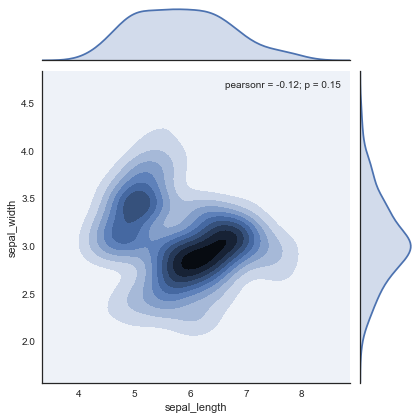

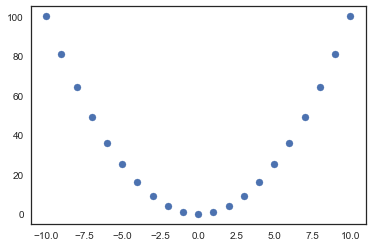

In [272]:
#%matplotlib inline
x = np.array(range(-10, 11))
y = x ** 2

plt.scatter(x, y)

In [28]:
x = np.array(range(-20, 21))

def graph(power):
    y = x**power
    return plt.show(plt.scatter(x, y))

interact(graph, power = widgets.IntSlider(value=2, min=1, max=10, description='Power'))

interactive(children=(IntSlider(value=2, description='Power', max=10, min=1), Output()), _dom_classes=('widget…

<function __main__.graph(power)>

In [278]:
# select species
def my_plot(species):
    sns.jointplot(x='sepal_length', y='sepal_width', data=iris[iris.species == species], kind="kde");

interact(my_plot,
         species = widgets.RadioButtons(options=sorted(iris.species.unique()),
                                        value=sorted(iris.species.unique())[0],
                                        description='Species')
        )

interactive(children=(RadioButtons(description='Species', options=('setosa', 'versicolor', 'virginica'), value='setosa'), Output()), _dom_classes=('widget-interact',))

<function __main__.my_plot>

In [279]:
# select species
def my_plot(species):
    sns.jointplot(x='sepal_length', y='sepal_width', data=iris[iris.species == species], kind="kde");

interact(my_plot,
         species = widgets.ToggleButtons(options=sorted(iris.species.unique()),
                                        value=sorted(iris.species.unique())[0],
                                        description='Species',
                                        tooltips=[s.capitalize() for s in sorted(iris.species.unique())])
        )


interactive(children=(ToggleButtons(description='Species', options=('setosa', 'versicolor', 'virginica'), tooltips=['Setosa', 'Versicolor', 'Virginica'], value='setosa'), Output()), _dom_classes=('widget-interact',))

<function __main__.my_plot>

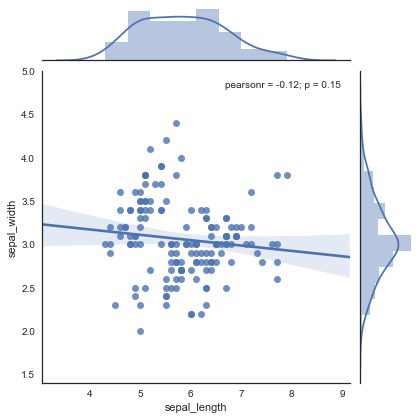

In [280]:
# seaborn jointplot
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind="reg");

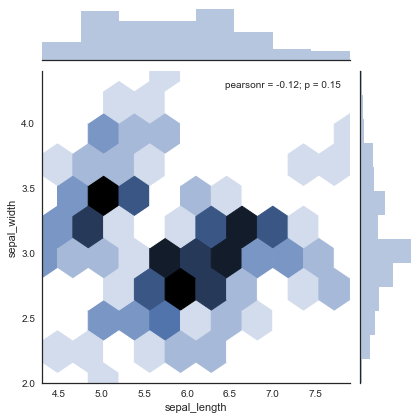

In [281]:
# seaborn jointplot
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind="hex");

In [282]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris[iris.species == species], kind="hex");

NameError: name 'species' is not defined

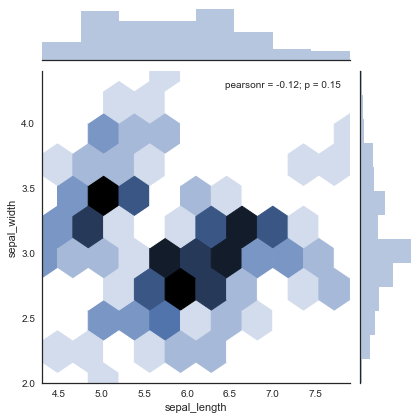

In [283]:
# seaborn jointplot
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind="hex");

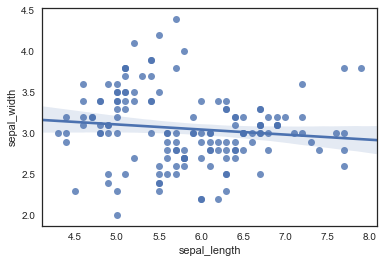

In [290]:
sns.regplot(x='sepal_length', y='sepal_width', data=iris)

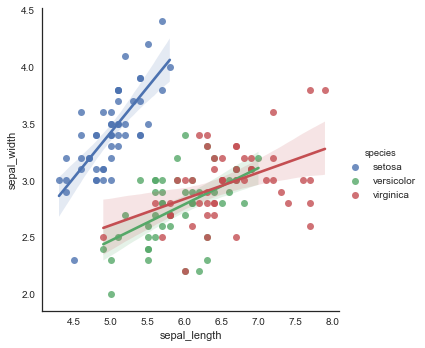

In [291]:
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", truncate=True, data=iris)

In [ ]:
def kwadraat(x):
    return x ** 2

interact(kwadraat, x = widgets.IntSlider())

In [ ]:
widgets.IntSlider(
    min = -5,
    max = 5,
    step =1,
    value = 0,
    description='IntSlider:',
    disabled = False,
    continuous_update = False,
    orientation = 'horizontal',
    readout = True,
    readout_format='d'
)

In [ ]:
widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
 #    value='pineapple',
    description='Pizza topping:',
    disabled=False
)

[https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [ ]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

[https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html](https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html)

In [ ]:
# seaborn settings
sns.set(color_codes=True)

In [ ]:
# load dataset
iris = sns.load_dataset('iris')

In [ ]:
# info
iris.info()

In [ ]:
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="sepal_length", y="species",
            hue="species", palette=["m", "g"],
            data=iris)
sns.despine(offset=10, trim=True)

In [ ]:
sns.pairplot(iris,hue='species',palette="muted",size=5,vars=['sepal_width','sepal_length','petal_length','petal_width'],kind='scatter',markers=['o','x','+'])

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(iris, hue="species",diag_kind="kde", palette="pastel")

In [ ]:
sns.pairplot(iris, diag_kind="kde", hue='species')

In [ ]:
sns.pairplot(iris, kind="reg", hue='species', diag_kind="kde")

In [ ]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris[iris.species == species], kind="kde");